In [1]:
import numpy as np
import csv
import math
import matplotlib.pyplot as plt
import random
import os

In [2]:
def open_csv(filename):
    dictionary = {}
    os.chdir("/kaggle/input/train-and-test")
    

    with open(filename, newline='\n') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            i, x, y = row[''], row['x'], row['y']
            dictionary[x] = y
    x_keys = [float(x) for x in dictionary]
    y_keys = [float(dictionary[key]) for key in dictionary]
    N = len(x_keys)
    return x_keys, y_keys, N

In [3]:
def predict_func(theta, x):
    return theta[0] + theta[1]*x

In [4]:
def theoretical_theta(x_keys, y_keys):
    sum_xyi = 0
    sum_x_i = 0
    sum_y_i = 0
    sum_x_i_squared = 0
    for i in range(N):
        sum_xyi = sum_xyi + x_keys[i]*y_keys[i]
        sum_x_i = sum_x_i + x_keys[i]
        sum_y_i = sum_y_i + y_keys[i]
        sum_x_i_squared = sum_x_i_squared + math.pow(x_keys[i] , 2)
    theta_1 = (sum_xyi - (1/N)*sum_x_i*sum_y_i) / (sum_x_i_squared - 1/N * math.pow(sum_x_i, 2))
    theta_0 = (sum_y_i)/N - theta_1*(sum_x_i/N)
    return theta_0, theta_1

In [5]:
def gradient_theta(alpha, x_train_keys, y_train_keys):
    theta_0 = random.random()
    theta_1 = random.random()
    tolerance = 0.00000001
    previous_theta = [0, 0]
    print('Inside Gradient function')
    N = len(x_train_keys)
    while (math.fabs(previous_theta[0] - theta_0) > tolerance) or (math.fabs(previous_theta[1] - theta_1) > tolerance):
        previous_theta = [theta_0, theta_1]
        sum_grad_theta_0 = 0
        sum_grad_theta_1 = 0
        mean_squared = 0
        for k in range(N):
            sum_grad_theta_0 = sum_grad_theta_0 + (predict_func([theta_0, theta_1], x_train_keys[k]) - y_train_keys[k])
            sum_grad_theta_1 = sum_grad_theta_1 + (predict_func([theta_0, theta_1], x_train_keys[k]) - y_train_keys[k])*x_train_keys[k]
            mean_squared = mean_squared + math.pow((predict_func([theta_0, theta_1], x_train_keys[k]) - y_train_keys[k]), 2)
        theta_0 = theta_0 - (alpha/N)*sum_grad_theta_0
        theta_1 = theta_1 - (alpha/N)*sum_grad_theta_1
        mean_squared = mean_squared/(2*N)
        print('theta_0 : ',theta_0, 'theta_1 : ',theta_1,' mean squared ',mean_squared)

    print('Gradient theta')
    print('theta_0 : ',theta_0, ' theta_1 : ',theta_1)
    return theta_0, theta_1


In [6]:
def test_mean_squared(x_test_keys, y_test_keys ,theta):
    N = len(x_test_keys)
    mean_squared = 0
    for k in range(N):
        mean_squared = mean_squared + math.pow((predict_func(theta, x_test_keys[k]) - y_test_keys[k]) , 2)
    mean_squared = mean_squared / (2*N)
    print('mean squared for test data : ',mean_squared)

Get theoretical value of weights and compare with gradient method 

In [7]:
x_test_keys, y_test_keys, m = open_csv('lab_1_test.csv')
x_train_keys, y_train_keys, N = open_csv('lab_1_train.csv')

theta_0 , theta_1 = theoretical_theta(x_train_keys, y_train_keys)

print('theoretical theta : ')
print('theta_0 : ', theta_0, ' theta_1 : ', theta_1)
theta_0_gradient , theta_1_gradient = gradient_theta(1, x_train_keys, y_train_keys)


theoretical theta : 
theta_0 :  19.95992525006205  theta_1 :  1.978784954463182
Inside Gradient function
theta_0 :  20.491557181604893 theta_1 :  6.090850558583218  mean squared  192.24330969143554
theta_0 :  18.734612772066683 theta_1 :  5.441484865576518  mean squared  1.8386585742910742
theta_0 :  18.92811063008383 theta_1 :  5.393182557580498  mean squared  0.23869340265784592
theta_0 :  18.942503742062442 theta_1 :  5.292988734065748  mean squared  0.2149938210199774
theta_0 :  18.972359477352192 theta_1 :  5.200468452939459  mean squared  0.2050210002185448
theta_0 :  18.999928652031237 theta_1 :  5.110098000815404  mean squared  0.19570321773515445
theta_0 :  19.026857221098506 theta_1 :  5.02230205293347  mean squared  0.1869014997657484
theta_0 :  19.05301863991181 theta_1 :  4.936964120123353  mean squared  0.17858645448011867
theta_0 :  19.078447619890582 theta_1 :  4.854019328904133  mean squared  0.1707311655671869
theta_0 :  19.10316349202156 theta_1 :  4.773400207905335 

Calculate Mean Squared for test data

In [8]:
test_mean_squared(x_test_keys, y_test_keys, [theta_0_gradient, theta_1_gradient])

mean squared for test data :  0.03779354784826044


**Red points on the graph from lab_1_train.csv
Blue points from lab_1_test.csv
Yellow line our expected line**


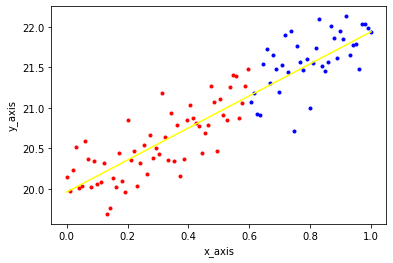

In [9]:
plt.xlabel('x_axis')
plt.ylabel('y_axis')

plt.plot(x_train_keys, y_train_keys, 'r.')
plt.plot(x_test_keys, y_test_keys, 'b.')
#plt.plot([x_train_keys[0], x_test_keys[39]],[predict_func([theta_0, theta_1] , x_train_keys[0]), predict_func([theta_0, theta_1], x_test_keys[39])], color="green")
plt.plot([x_train_keys[0] , x_test_keys[39]],[predict_func([theta_0_gradient, theta_1_gradient], x_train_keys[0]), predict_func([theta_0_gradient, theta_1_gradient], x_test_keys[39])], color="yellow")
plt.show()